In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight_data = pd.read_excel('flight_price.xlsx')
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# 1. Checking the dimensions

In [3]:
flight_data.shape[0], flight_data.shape[1]

(10683, 11)

# 2. Histogram to visualize the distribution of flight prices

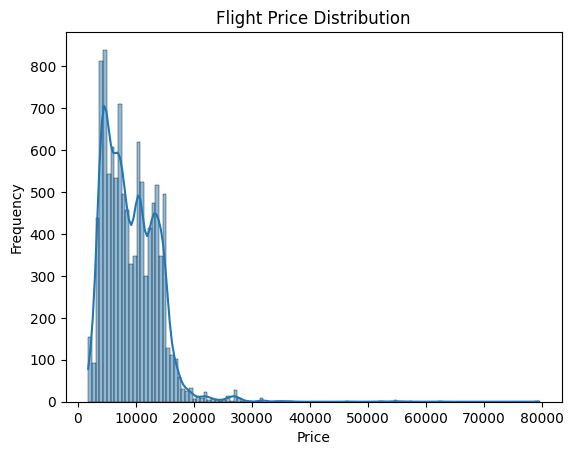

In [4]:
sns.histplot(flight_data['Price'], kde=True)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. Range of prices in the dataset

In [5]:
min_price = flight_data['Price'].min()
max_price = flight_data['Price'].max()
range_price = max_price - min_price

print(f"Range of Price: {range_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Range of Price: 77753
Minimum Price: 1759
Maximum Price: 79512


# 4. Variation of price of flight by airline

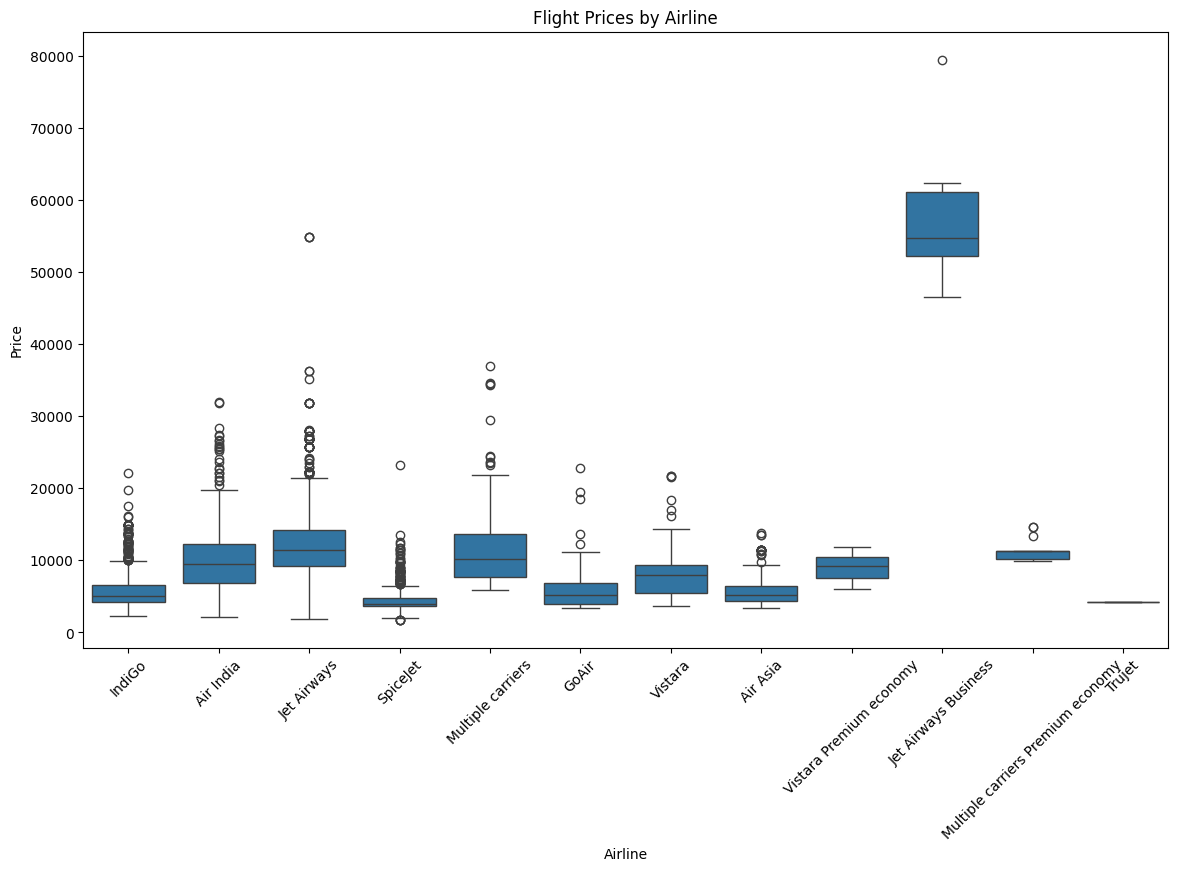

In [6]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Airline', y='Price', data=flight_data)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# 5. Identification of outliers

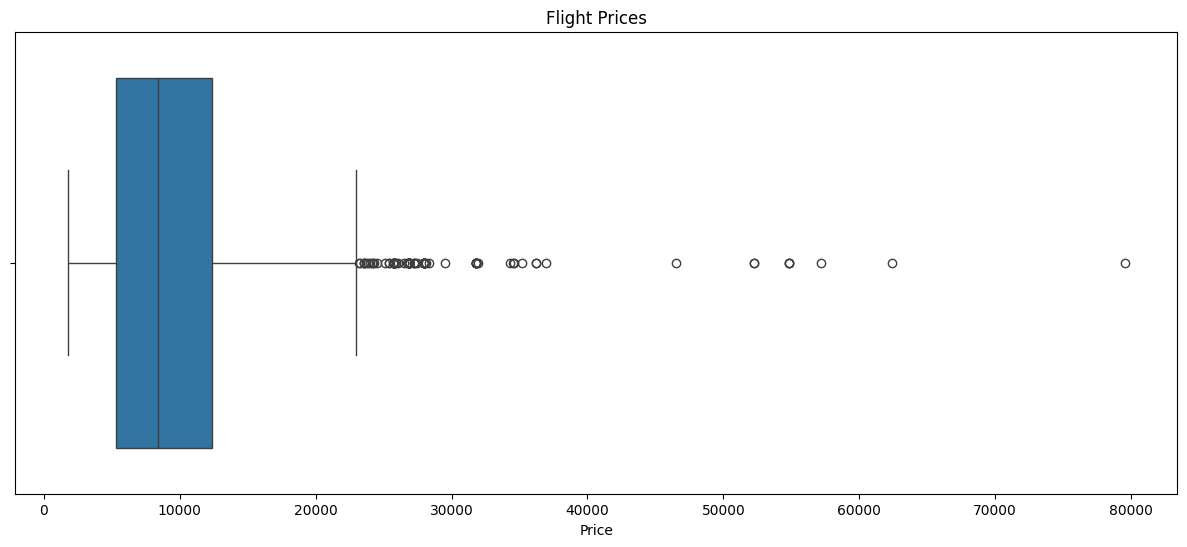

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Price', data=flight_data)
plt.title('Flight Prices')
plt.xlabel('Price')
plt.show()

In [8]:
flight_data['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

# 6. Identifying Peak Travel Season

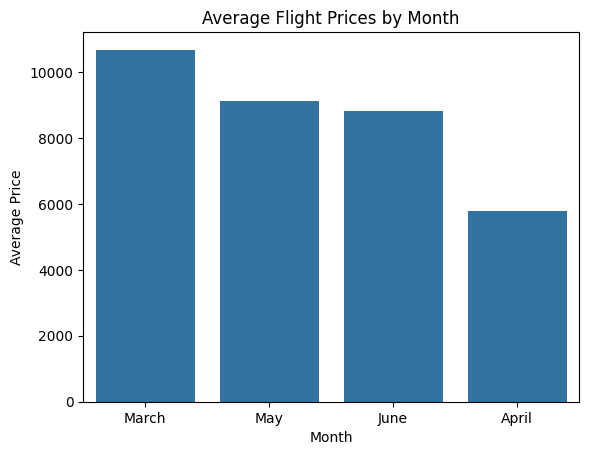

In [9]:
# Extracting month from the 'Date_of_Journey' column
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'], dayfirst=True)
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month_name()

# Visualizing average prices over different months
sns.barplot(x='Month', y='Price', data=flight_data, errorbar=None, estimator='mean')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

# 7. Analyzing Trends in Flight Prices

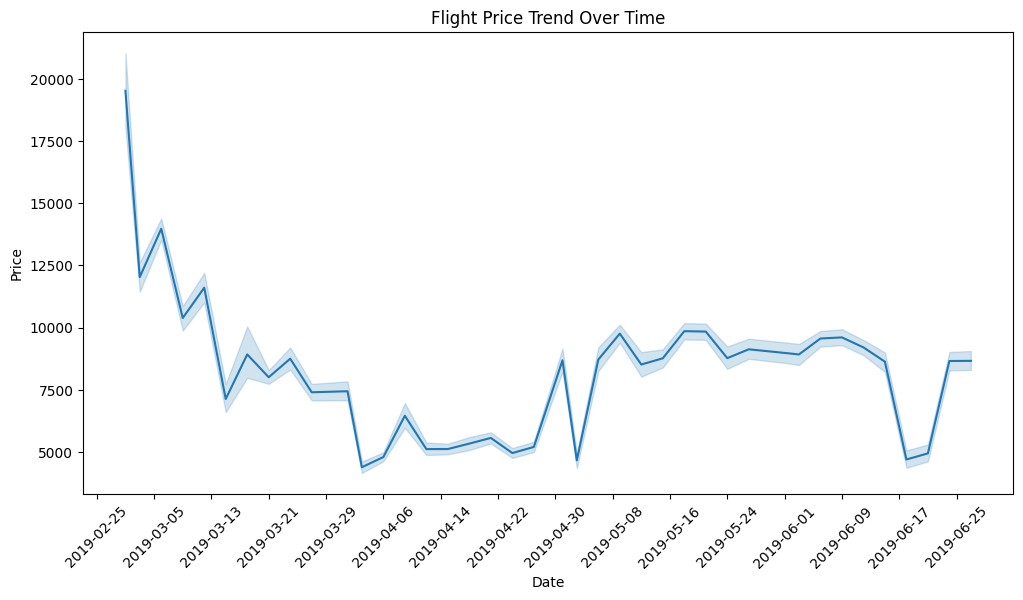

In [10]:
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'], dayfirst=True)
flight_data.sort_values(by='Date_of_Journey', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=flight_data)
plt.title('Flight Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))

plt.show()

# 8. Identifying Factors Affecting Flight Prices

In [11]:
def convert_to_hours(time_str):
    # Split the input string into hours and minutes
    parts = time_str.split()
    
    # Initialize hours and minutes variables
    hours = 0
    minutes = 0
    
    # Loop through the parts and extract hours and minutes
    for part in parts:
        if 'h' in part:
            hours += int(part.replace('h', ''))
        elif 'm' in part:
            minutes += int(part.replace('m', ''))
    
    # Convert minutes to hours and add to the total
    hours += minutes / 60
    
    return hours

flight_data['Duration_hours'] = flight_data['Duration'].apply(convert_to_hours)
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Duration_hours
785,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → BHO → DEL,08:50,23:25,14h 35m,2 stops,1 Short layover,26743,March,14.583333
3535,Air India,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,11:50,23:55,12h 5m,1 stop,Change airports,26092,March,12.083333
5549,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,06:55,09:35,2h 40m,non-stop,No info,4622,March,2.666667
4765,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,16:10,8h 10m,1 stop,No info,22270,March,8.166667
3835,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,March,2.500000


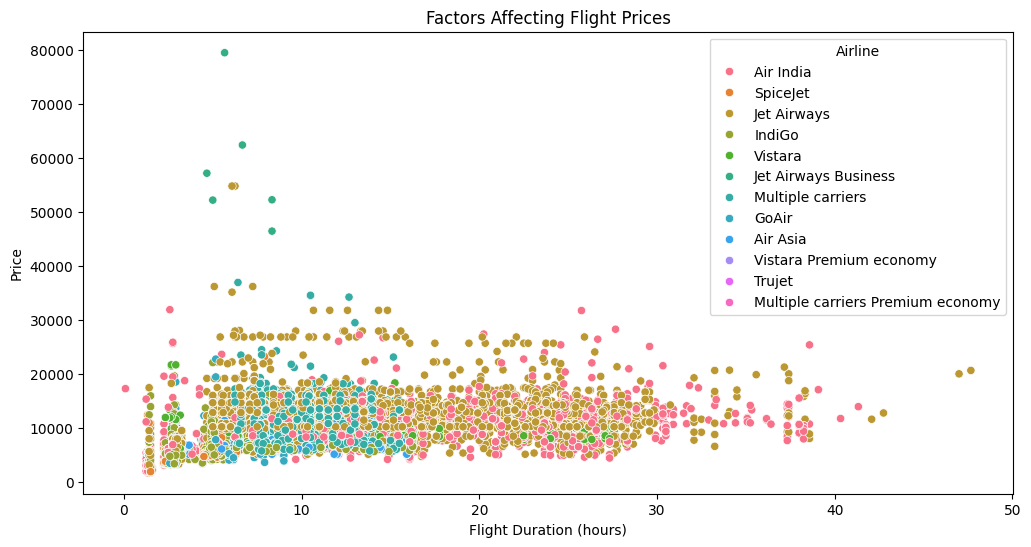

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Duration_hours', y='Price', hue='Airline', data=flight_data)
plt.title('Factors Affecting Flight Prices')
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Price')
plt.legend(title='Airline', bbox_to_anchor=(1, 1))
plt.show()

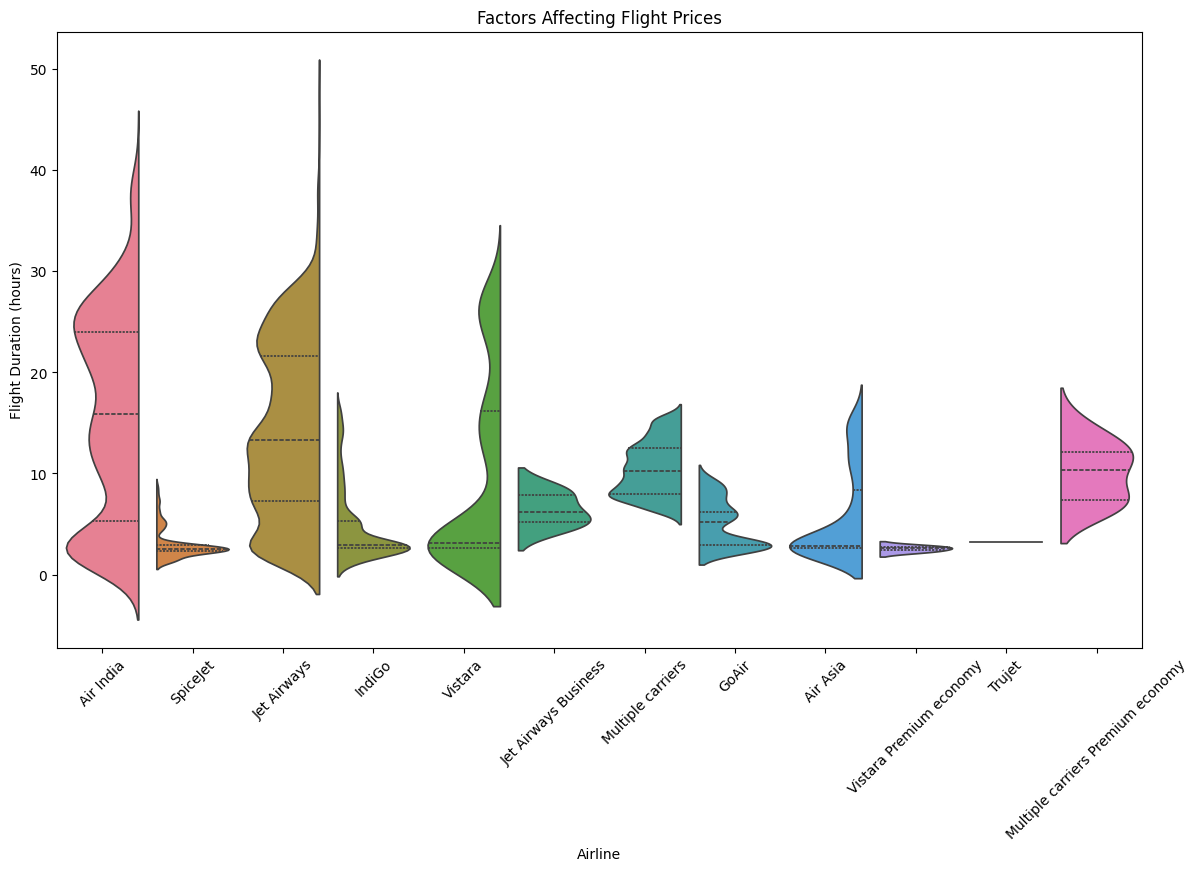

In [13]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Airline', y='Duration_hours', data=flight_data, inner="quartile", hue='Airline', split=True)
plt.title('Factors Affecting Flight Prices')
plt.xlabel('Airline')
plt.ylabel('Flight Duration (hours)')
plt.xticks(rotation=45)
# plt.legend(title='Airline', bbox_to_anchor=(1, 1))
plt.show()